# Tutotial 02 - Interacting With and Plotting Ehys Data 

In Tutorial 1 - Introduction to pyCAP, we covered loading and making a simple plot of a single data set. Here we will expand upon this to cover  working with channel types and channel names as well as loading multiple data sets. We can start by importing pyCAP and loading a data set.

In [1]:
import pyCAP

# path to directory containing the TDT tank
directory = 'C:/Users/james/OneDrive/Documents/Data/pyCAP/TDT/pnpig200113-200113-142737'
data = pyCAP.Ephys(directory)

read from t=0s to t=855.82s


## Working with Channels and Channel Types

This data set was collected with a Tucker Davis Technologies (TDT) recording system. The Ephys class automatically maps the data on your computer's hard disk. This data set contains two streams of Ephys data, called 'RawE' and 'RawG' that we collected in different stores within the TDT data tank (more information on how TDT data types are stored and accessed can be found here: https://www.tdt.com/support/python-sdk/). The data within stores 'RawE' and 'RawG' were automatically detected by pyCAP.

We can use the _ch_names_ property of an Ephys object to look at the number of channels. We see that this data set has 8 channels, which were automatically named by pyCAP byased on the stream name assaigned within the TDT software.

In [2]:
data.ch_names

['RawE 1',
 'RawE 2',
 'RawE 3',
 'RawE 4',
 'RawG 1',
 'RawG 2',
 'RawG 3',
 'RawG 4']

In this experiment, 'RawE' contains data recorded from 4 LIFE electrodes inserted into the swine vagus nerve, and 'RawG' contains data recorded from EMG electrodes inserted into relevent muscle groups. Although 'RawE' contains 4 channels of data, only 3 electrodes in channels 'RawG 1'-'RawG 3' were used in the experiment. We can start by removing the extra channel of EMG data from the data set and renamving the channels to something that makes more sense. We will also set the channel types to either 'EMG' or 'LIFE' so that we can independently interact with these channels through the rest of our analysis.

It is important to note that all operations that change an object within pyCAP return a new object. For those familiar with other scientific conputing languages in python like numpy or pandas, pyCAP objects are never modified in place like numpy arrays or padas dataframes can be.

In [3]:
# Starting by removing the excess channel 'RawG 4'. We could do this either by the index in the channel list (7) or using the channel name directly. 
used_data = data.remove_ch('RawG 4')

# We can rename the channels using the set_ch_names method and providing a list of new channel names that matches the number of channels in the data set.
renamed_data = used_data.set_ch_names(['LIFE 1', 'LIFE 2', 'LIFE 3', 'LIFE 4', 'EMG 1', 'EMG 2', 'EMG 3'])

# Lets also set the types of the individual channels so that we can indepentently interact with LIFE and EMG channels
renamed_data = renamed_data.set_ch_types(['LIFE', 'LIFE', 'LIFE', 'LIFE', 'EMG', 'EMG', 'EMG'])

In [4]:
data.shape

(8, 20893696)

We can compare a plot of data with a plot of renamed_data to see the changes in the number of channels and in the prescribed channel names. We can plot these side by side in figure subplots using matplotlib. 

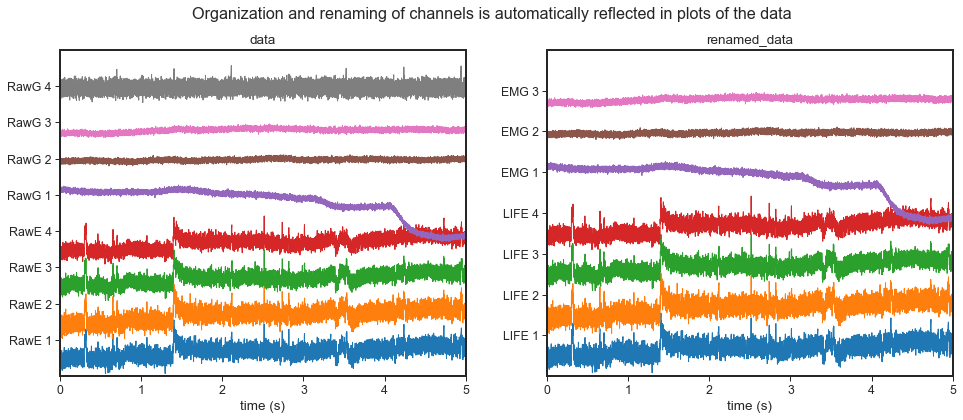

In [5]:
# import matplotlib
import matplotlib.pyplot as plt

# Set up figure axes that we can plot on
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle('Organization and renaming of channels is automatically reflected in plots of the data')

# Label axes and plot data. 
ax1.set_title('data')
# The axis attribute is used to provide a matplotlib axis to plot on.
# Show is set to False to prevent the plot function from automatically showing the plot within the jupyter notebook.
data.plot(axis = ax1, x_lim=(0,5), show=False)
ax2.set_title('renamed_data')
renamed_data.plot(axis = ax2, x_lim=(0,5), show=False)

# Tell matplotlib to show the plot within a jupyter notebook
plt.show()

## Interactive Plotting of Data

One of the main goals of pyCAP is to allow for interactively working with electrophysiology, and in particular compound action potential, data during or shortly after an experiment. As such, many plot types have been designed as jupyter notebook widgets and can be taken advantage of to interactively work with data or to view data in real time.

The most simple example of this is the plot method for the ephys class. By passhing show='notebook' as an attribute to the plot method, an interactive plot is shown within the current jupyter notebook output cell. 

However, before using interactive plots we need to change matplotlib to use an interactive backend. We can do this using the a Jupyter Notebook magic (for more information on jupyter notebook magics see this tutorial: https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). In our case we want to use the magic command '%matplotlib widget'. If we switch back to '%matplotlib inline' which is the default mode for matplotlib, it will break our connection to any widgets in use. As such it is a good idea to only work with matplotlib in inline or widget mode within a given notebook.

In [6]:
%matplotlib widget
data.plot(x_lim = (0,0.1), show='notebook')

AppLayout(children=(Output(layout=Layout(grid_area='header')), FloatSlider(value=0.0, description='Start Time:…

Any plot that we create can be used with the matplotlib widget backend. As an example, we can replicate the side-by-side plot of data and renamed data that we created above using the widget backend instead of the inline backend.

In [10]:
# import matplotlib
import matplotlib.pyplot as plt

# Set up figure axes that we can plot on
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Organization and renaming of channels is automatically reflected in plots of the data')

# Label axes and plot data. 
ax1.set_title('data')
# The axis attribute is used to provide a matplotlib axis to plot on.
# Show is set to False to prevent the plot function from automatically showing the plot within the jupyter notebook.
data.plot(axis = ax1, x_lim=(0,5), show=False)
ax2.set_title('renamed_data')
renamed_data.plot(axis = ax2, x_lim=(0,5), show=False)

# Tell matplotlib to show the plot within a jupyter notebook
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Directly Working with Ephys Data as an Array

It is common that we will want extract portions of our data to directly work with as an array of values. In python the normal way to work with array data is as a numpy array. An introduction to numpy arrays can be found here (https://numpy.org/doc/stable/user/quickstart.html). For all intents and purposes, we can treat an ephys object as numpy arrays with shape equal to *number of channels* x *number of data points*.

In [11]:
renamed_data.shape

(7, 20893696)

Data can be directly accessed by indexing into the data set. For instance we can return the first 10 elements of channel 0 in *renamed_data* using the follwoing code. All numpy indexing methods are supported.

In [13]:
renamed_data[0,0:10]

array([-2.0671998e-05, -1.6127999e-05, -1.4527999e-05, -2.3359999e-05,
       -1.2543999e-05, -2.1695998e-05, -1.8111999e-05, -2.5983998e-05,
       -2.4767998e-05, -1.7983999e-05], dtype=float32)

In addition to working with Ephys data as a numpy array, there are a number of useful properties that are worth knowing about. Some of the most useful ones are:

* sample_rate
 - Gives the sampling rate for the data set.
* time
 - Returns as array starting at zero of time points corresponding to each data point within the data set.
* ch_names
 - Returns a list of names for each channel within the data set. 
* ch_types
 - Returns a list of types assigned to each channel in the data set.
 
 
 For instance, we can easily see that the sampling rate of *renamed_data* is a little under 25kHz:

In [15]:
renamed_data.sample_rate

24414.0625

We can also check that the channel names match what we previously set them to:

In [16]:
renamed_data.ch_names

['LIFE 1', 'LIFE 2', 'LIFE 3', 'LIFE 4', 'EMG 1', 'EMG 2', 'EMG 3']

Lastly we can see that there are two channel types contained within *renamed_data*. These channel types match what we previously assigned to the data set:

In [17]:
renamed_data.ch_types

['LIFE', 'EMG']